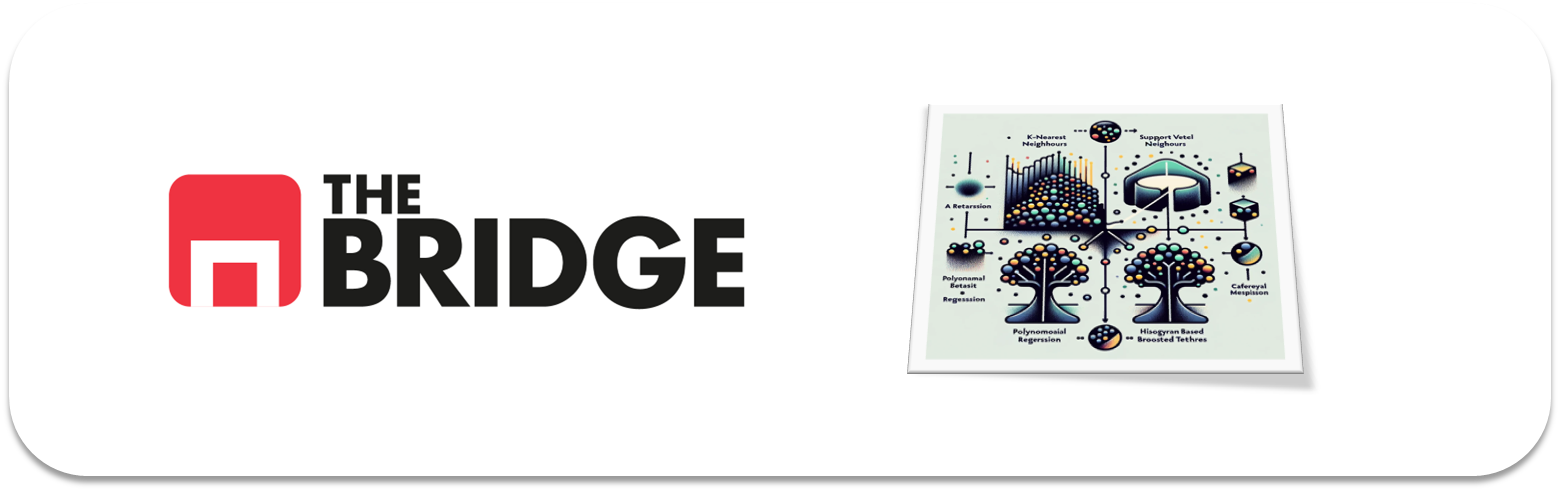

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [63]:
import bootcampviztools as bt
import Toolbox_ML as tlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import linear_model, metrics, model_selection


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

from joblib import dump, load

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [103]:
df = pd.read_csv(".\data\wines_dataset.csv", sep="|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
tlb.describe_df(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
Tipos,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,106,187,89,316,214,135,276,998,108,111,111,7,2
% Cardinalidad,1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [6]:
tlb.tipifica_variables(df, 7, 10)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numérica Discreta
1,volatile acidity,Numérica Discreta
2,citric acid,Numérica Discreta
3,residual sugar,Numérica Discreta
4,chlorides,Numérica Discreta
5,free sulfur dioxide,Numérica Discreta
6,total sulfur dioxide,Numérica Discreta
7,density,Numérica Continua
8,pH,Numérica Discreta
9,sulphates,Numérica Discreta


In [104]:
target_clf = "quality"
target_rgs = "alcohol"

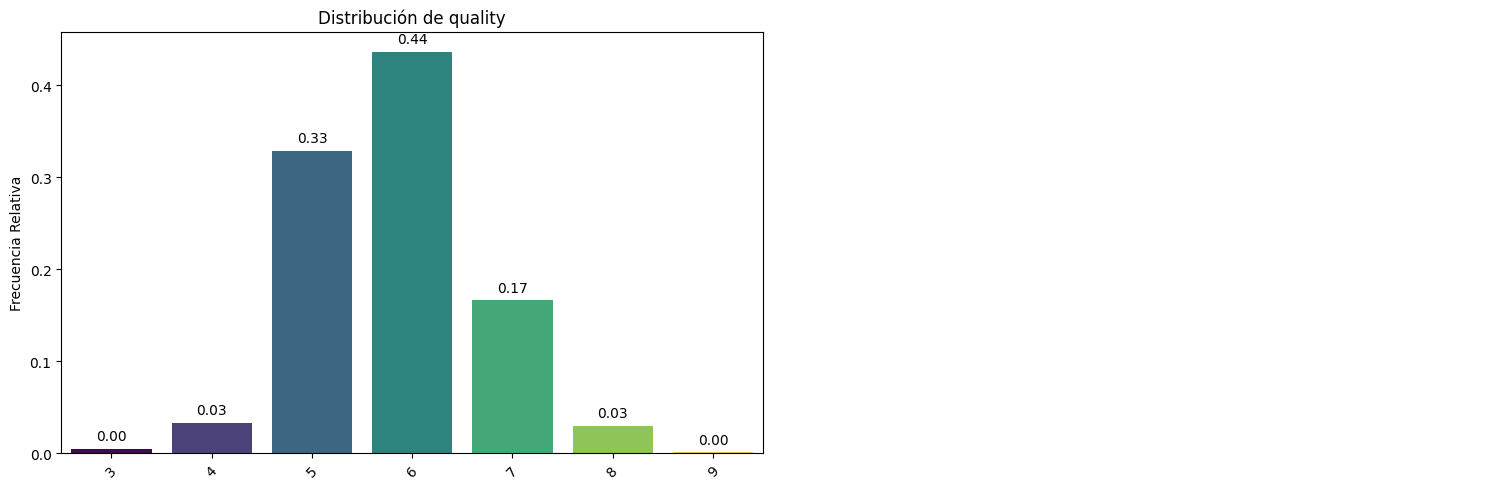

In [105]:
bt.pinta_distribucion_categoricas(df, [target_clf], relativa=True, mostrar_valores=True)

En el caso de Clasificacion, la target es "quality". 

La distribucion de la target en los datos existentes parece una campana de Gauss lo cual era de esperar y esta bien para el modelado.

El problema está en las clases de las que no tenemos datos: 0, 1, 2, 10 . Lo cual no s va resultar en un modelo que nunca predecirá esas clases porque no las conoce ni sabe que existen.

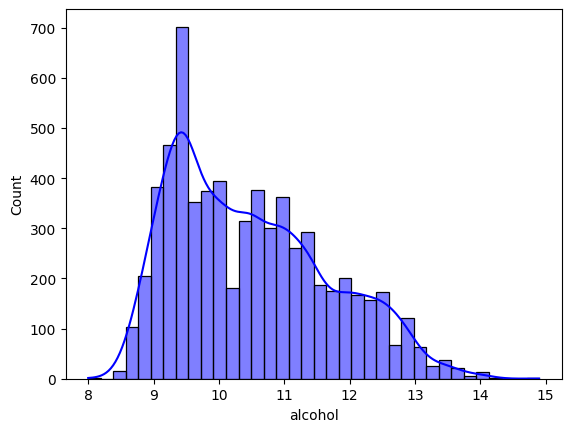

In [106]:
sns.histplot(df[target_rgs], color='Blue', kde = True)
plt.show()

En el caso de Clasificacion, la target es "alcohol". 

La distribucion de la target parece una campana escorada hacia la izquierda. 

No veo problema para el modelado.

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [107]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

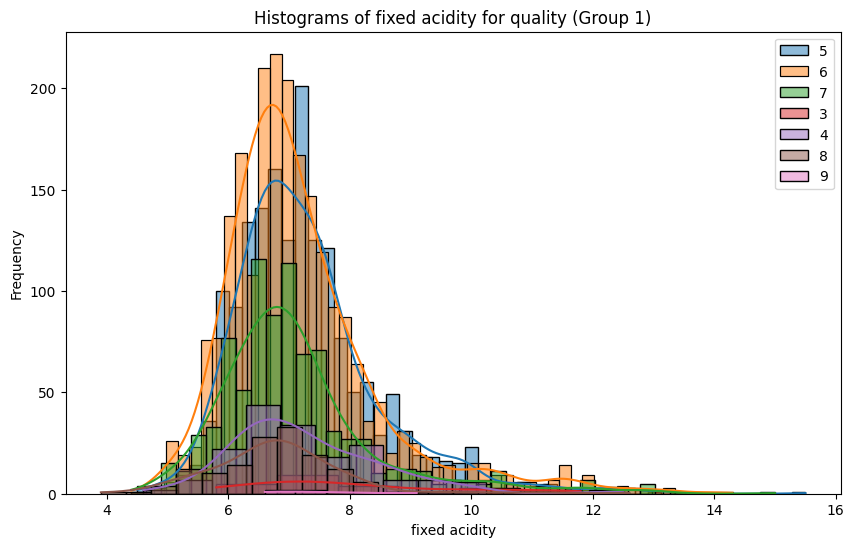

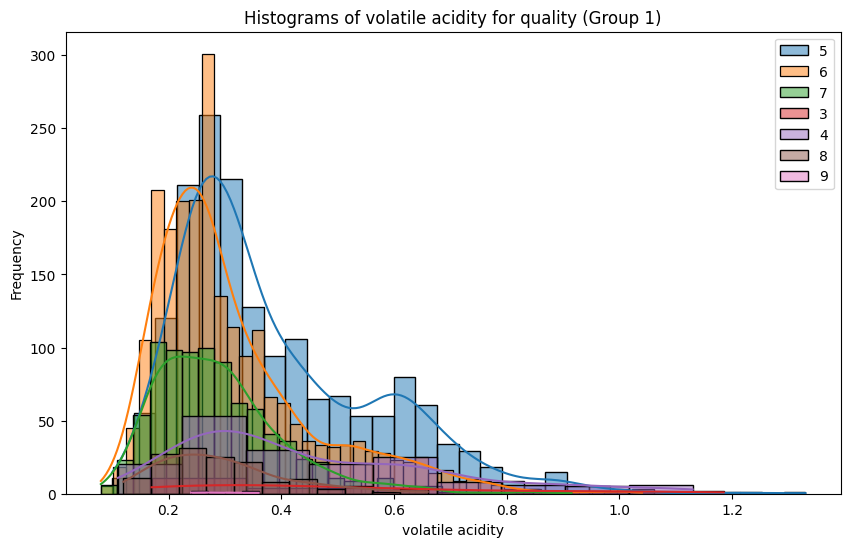

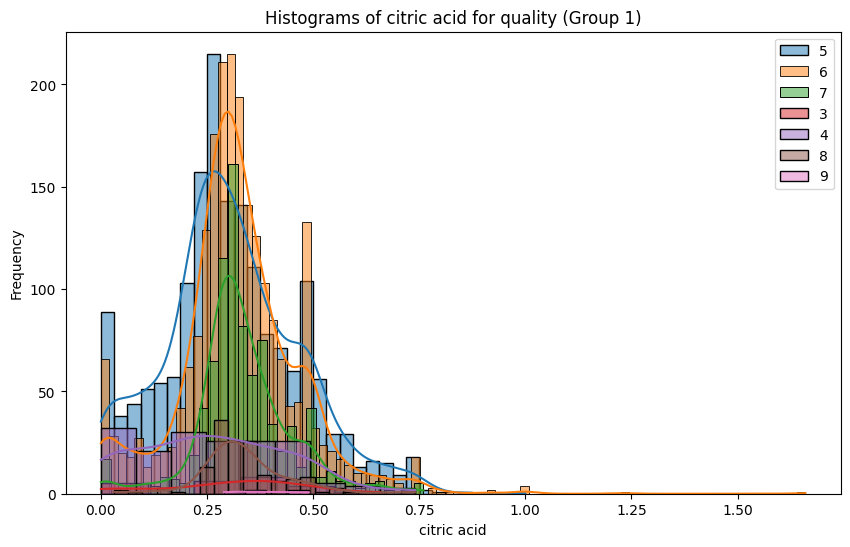

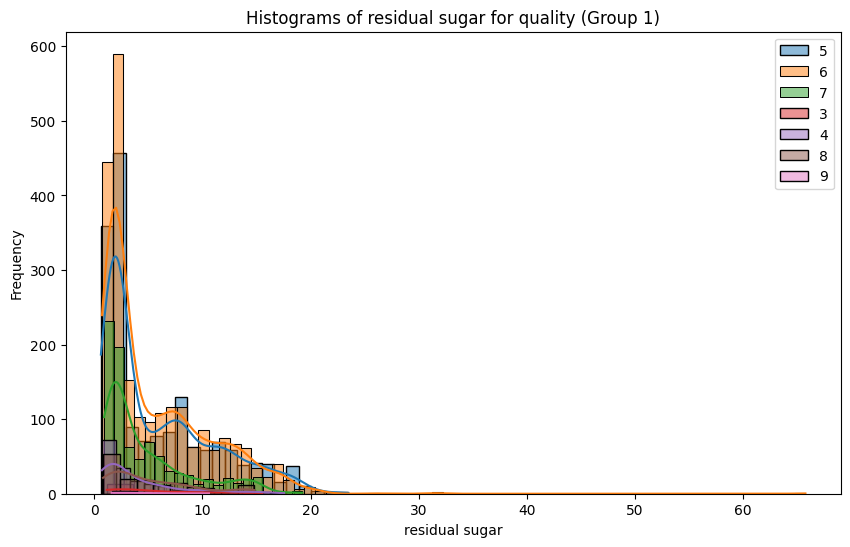

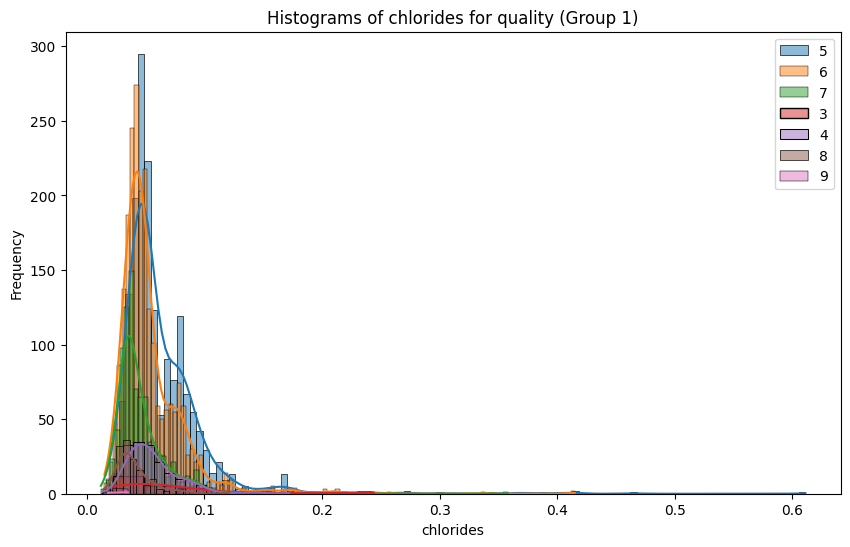

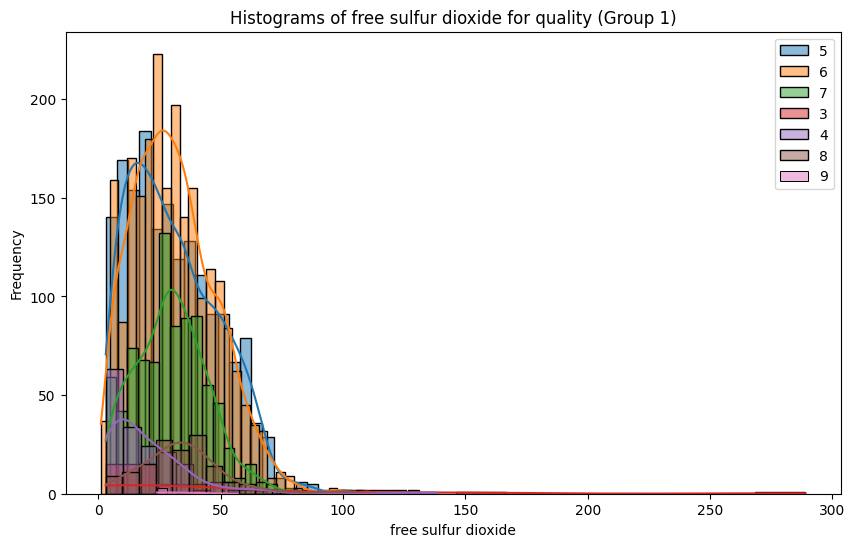

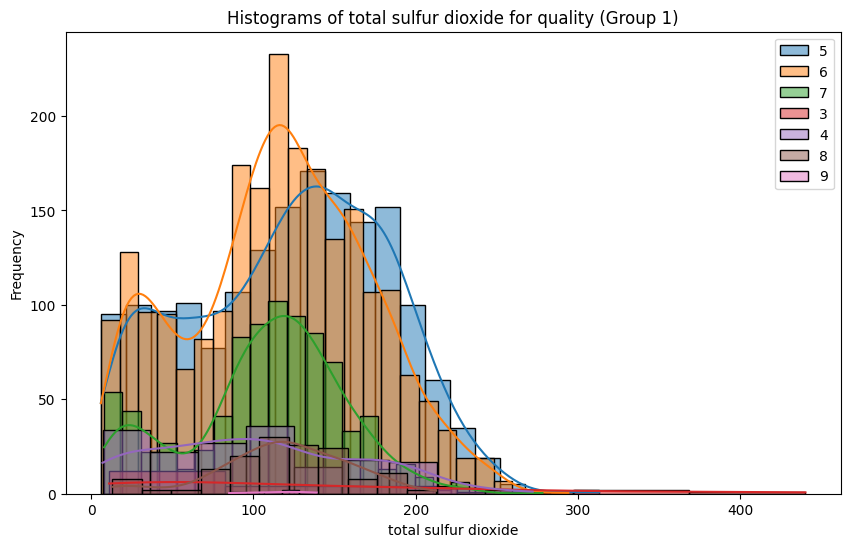

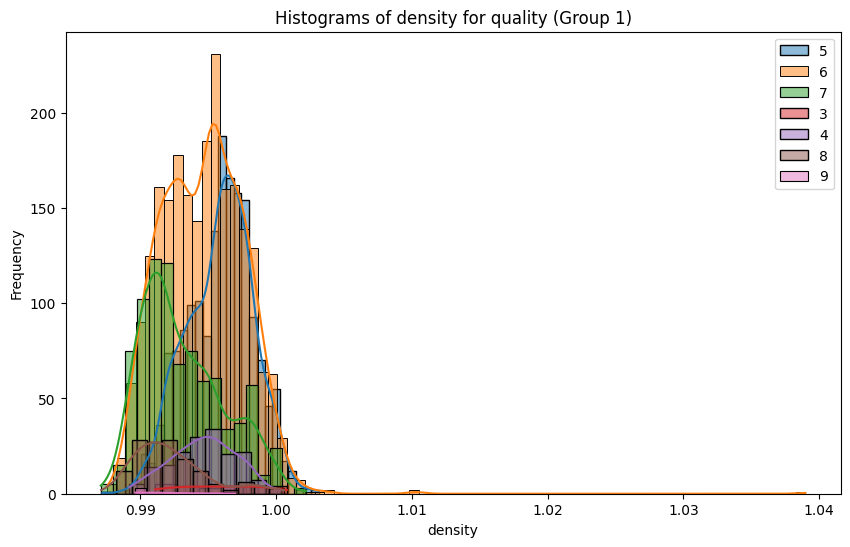

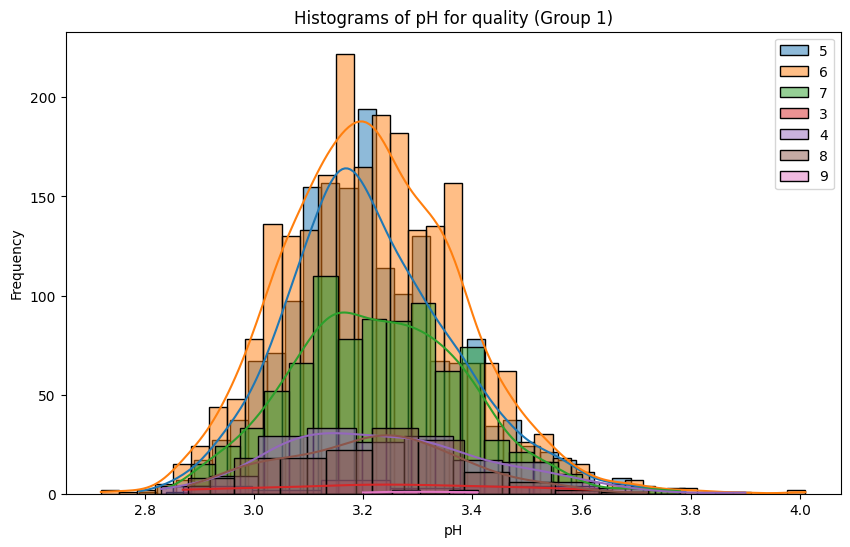

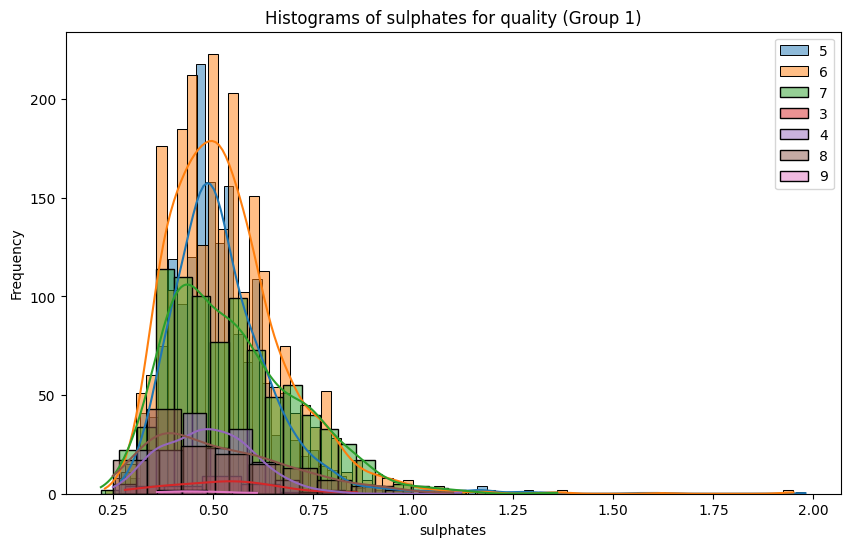

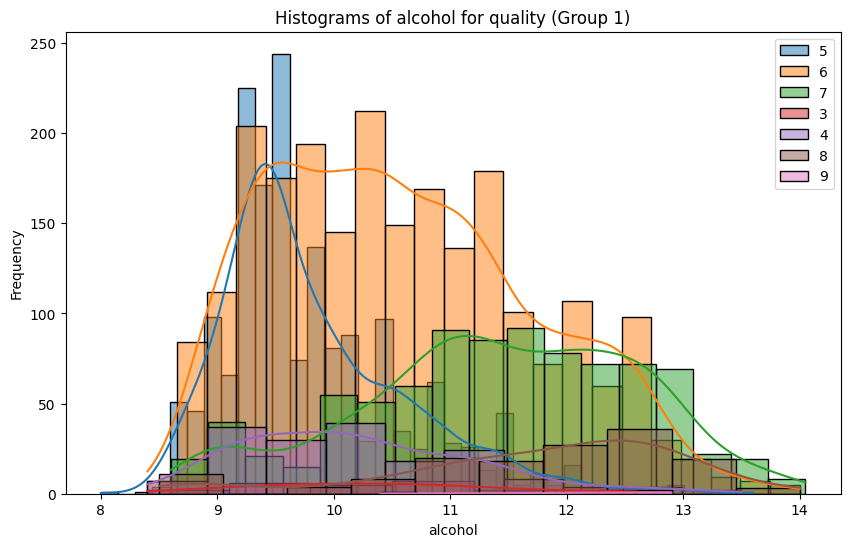

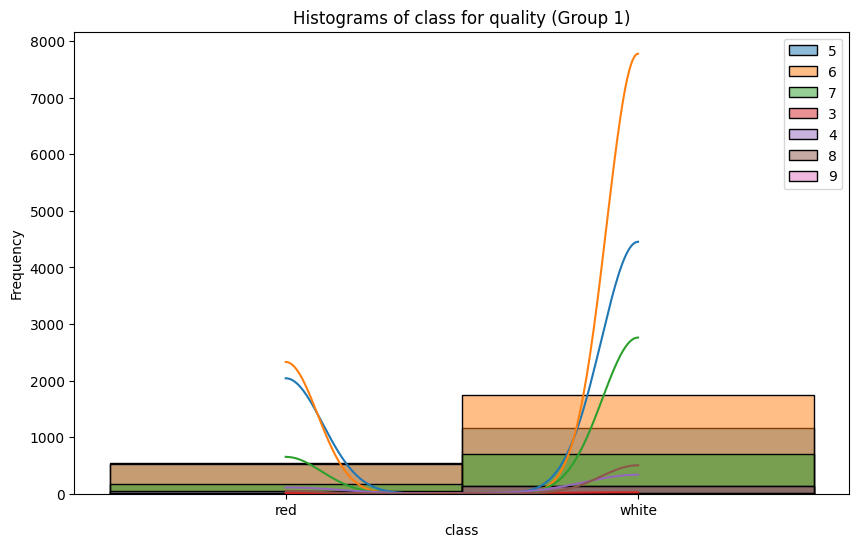

In [108]:
target = target_clf
for valor in train_set.columns:
    if valor != target:
        bt.plot_grouped_histograms(train_set, target, valor, group_size=7)

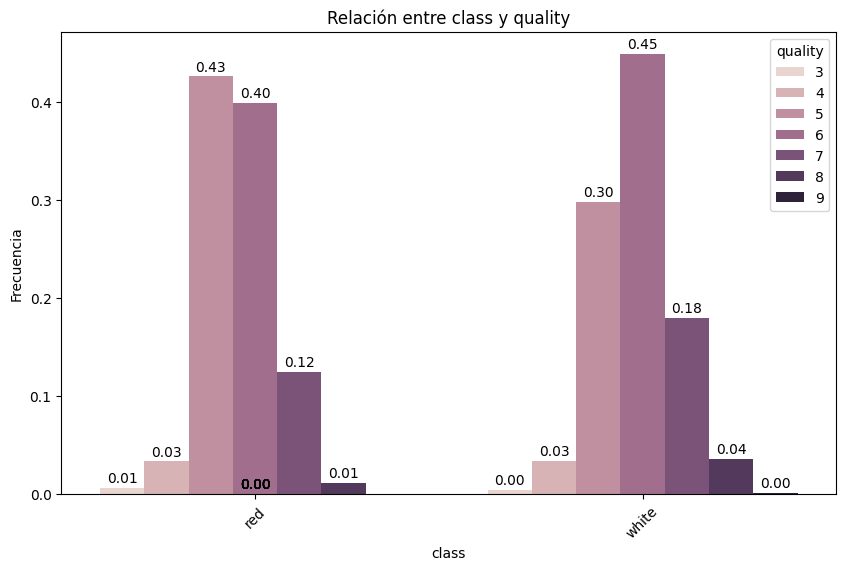

In [12]:
bt.plot_categorical_relationship_fin(df, "class", target, relative_freq=True, show_values=True, size_group = 7)

In [109]:
features_out = "fixed acidity"

features_in = df.columns.to_list()
print(features_in)
features_in.remove(features_out)
features_in.remove(target)
print(features_out)
print(target)
print(features_in)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'class']
fixed acidity
quality
['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'class']


In [110]:
y_train = train_set[target]
X_train = train_set[features_in]
y_test = test_set[target]
X_test = test_set[features_in]

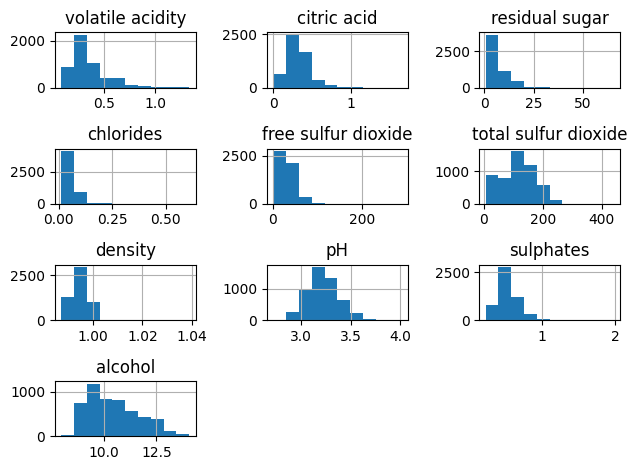

In [15]:
figsize = (15,15)
train_set[features_in].hist()
plt.tight_layout();

In [111]:
features_to_log = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']

In [112]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [113]:
for valor in features_to_log:
    X_train_scaled[valor]=np.log(X_train_scaled[valor] + 1 )
    X_test_scaled[valor]=np.log(X_test_scaled[valor] + 1 )

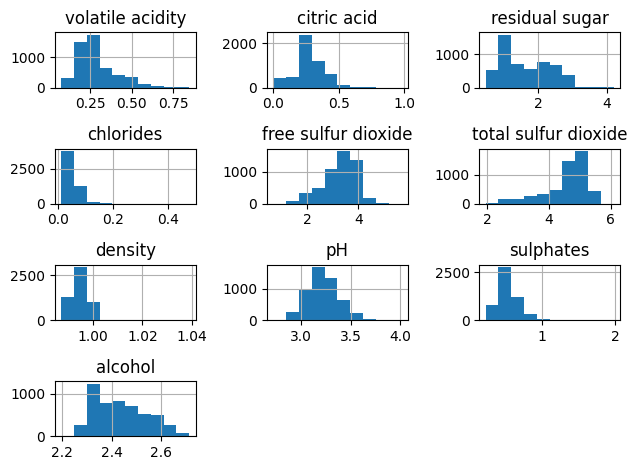

In [19]:
X_train_scaled.hist()
plt.tight_layout();

In [114]:
scaler = StandardScaler()
X_train_scaled[features_to_log] = scaler.fit_transform(X_train_scaled[features_to_log])
X_test_scaled[features_to_log] = scaler.transform(X_test_scaled[features_to_log])

In [115]:
def convertir(x):
    if x == "white":
        return 0
    else:
        return 1
    
X_train_scaled["class"] = X_train_scaled["class"].apply(convertir)
X_test_scaled["class"] = X_test_scaled["class"].apply(convertir)

In [33]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
y_pred_train = knn_clf.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           3       0.33      0.08      0.13        24
           4       0.46      0.29      0.36       173
           5       0.71      0.77      0.74      1706
           6       0.70      0.75      0.72      2274
           7       0.68      0.56      0.62       869
           8       0.58      0.22      0.32       146
           9       0.00      0.00      0.00         5

    accuracy                           0.69      5197
   macro avg       0.50      0.38      0.41      5197
weighted avg       0.68      0.69      0.68      5197



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train)
y_pred_train = knn_clf.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           3       0.48      0.58      0.53        24
           4       0.53      0.56      0.55       173
           5       0.77      0.83      0.80      1706
           6       0.79      0.80      0.80      2274
           7       0.78      0.70      0.74       869
           8       0.72      0.43      0.54       146
           9       0.00      0.00      0.00         5

    accuracy                           0.77      5197
   macro avg       0.58      0.56      0.56      5197
weighted avg       0.77      0.77      0.77      5197



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [24]:
model_names = ["KNN", "Reg. Logistica", "Random Forest","LightGBM","CatBoost"]
#model_names = ["KNN", "Reg. Logistica", "Random Forest","XGBoost","LightGBM","CatBoost"]

knn_clf = KNeighborsClassifier(n_neighbors=3)
lr_clf = LogisticRegression(max_iter = 10000)
rf_clf = RandomForestClassifier(max_depth=5, random_state= 42)
#xgb_clf = XGBClassifier(max_depth=5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth=5, random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(max_depth=5, random_state= 42, verbose = False)

model_set = [knn_clf, lr_clf, rf_clf, lgb_clf, cat_clf]
#model_set = [knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

In [25]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(f"Para {nombre}:", end = " ")
    if nombre not in ["KNN", "Reg. Logistica", "Random Forest", "LightGBM", "CatBoost"]:
        metrica = cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")
    else:
        metrica = cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")
    print(np.mean(metrica))
    metricas_cv[nombre] = metrica
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"And the winner is: {ganador} con una metrica de {np.mean(metricas_cv[ganador])}")

Para KNN: 0.258406026998122
Para Reg. Logistica: 0.2278024357692877
Para Random Forest: 0.21582019552536144
Para LightGBM: 0.3140134019660643
Para CatBoost: 0.30918745345901716
And the winner is: LightGBM con una metrica de 0.3140134019660643


Los reultados es muy flojo. Probamos balenceando weights. 

In [26]:
knn_clf = KNeighborsClassifier(n_neighbors=3, weights= "distance")
lr_clf = LogisticRegression(max_iter = 10000, class_weight = "balanced")
rf_clf = RandomForestClassifier(max_depth=5, class_weight = "balanced",random_state= 42)
#xgb_clf = XGBClassifier(max_depth=5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth=5, class_weight = "balanced", random_state= 42, verbose = -100)
#cat_clf = CatBoostClassifier(max_depth=5, random_state= 42, verbose = False)

In [27]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(f"Para {nombre}:", end = " ")
    if nombre not in ["KNN", "Reg. Logistica", "Random Forest", "LightGBM", "CatBoost"]:
        metrica = cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")
    else:
        metrica = cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")
    print(np.mean(metrica))
    metricas_cv[nombre] = metrica
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"And the winner is: {ganador} con una metrica de {np.mean(metricas_cv[ganador])}")

Para KNN: 0.258406026998122
Para Reg. Logistica: 0.2278024357692877
Para Random Forest: 0.21582019552536144
Para LightGBM: 0.3140134019660643
Para CatBoost: 0.30918745345901716
And the winner is: LightGBM con una metrica de 0.3140134019660643


In [28]:
param_grid = {
    "n_estimators": [100,200,1000],
    "max_depth": [1,5,10,20],
    "learning_rate": [0.1,0.3,0.6,1,0.01]
}

lgb_grid = GridSearchCV(lgb_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

lgb_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced', max_depth=5,
                                      random_state=42, verbose=-100),
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 1, 0.01],
                         'max_depth': [1, 5, 10, 20],
                         'n_estimators': [100, 200, 1000]},
             scoring='balanced_accuracy')

In [29]:
print("LightGBM best_score:", lgb_grid.best_score_)

LightGBM best_score: 0.3792758476040642


In [30]:
print("LightGBM best_score:", lgb_grid.best_params_)

LightGBM best_score: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 200}


In [31]:
y_pred_lgb_grid = lgb_grid.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lgb_grid))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.17      0.42      0.24        43
           5       0.64      0.61      0.63       432
           6       0.65      0.40      0.49       562
           7       0.40      0.64      0.50       210
           8       0.29      0.55      0.38        47
           9       0.00      0.00      0.00         0

    accuracy                           0.51      1300
   macro avg       0.31      0.38      0.32      1300
weighted avg       0.57      0.51      0.52      1300



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

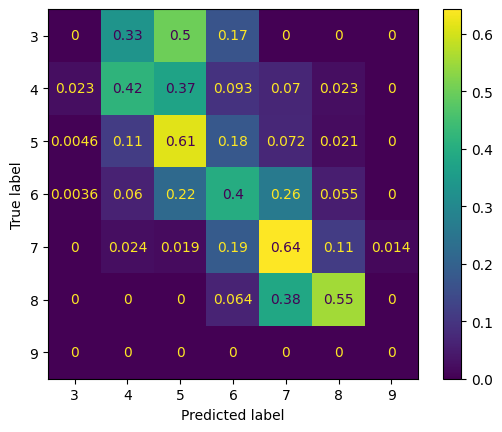

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_grid.best_estimator_.predict(X_test_scaled), normalize = "true")

Como se venía viendo en la validacion cruzada hay poco acierto en general porque hay clases que cuesta detectar ya que tenemos pocos datos de las mismas, com 3 o 9. 

Tambien hay clases "missing" que nunca detectariamos por que el modelo ni sabe que existen: 0, 1 , 2 y 10.

Por lo tanto la mejor forma de mejorar el modelo es consiguiendo mas datos que incluyan muchas ocuurrencias de las clases minoritarias y de las desconocidas.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [116]:
target = target_rgs
df[target].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

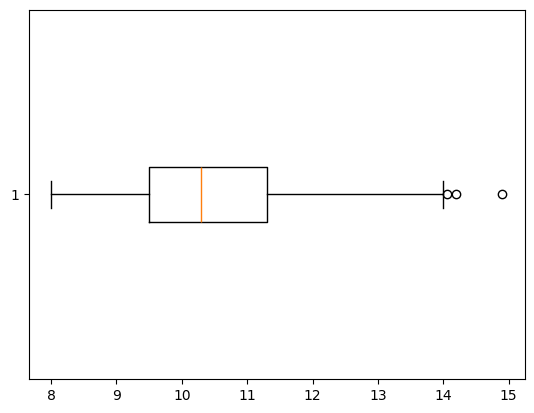

In [117]:
plt.boxplot(df[target], vert=False);

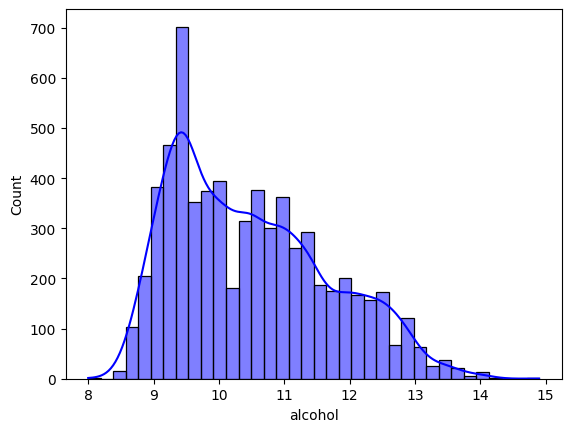

In [118]:
sns.histplot(df[target], color='Blue', kde = True)
plt.show()

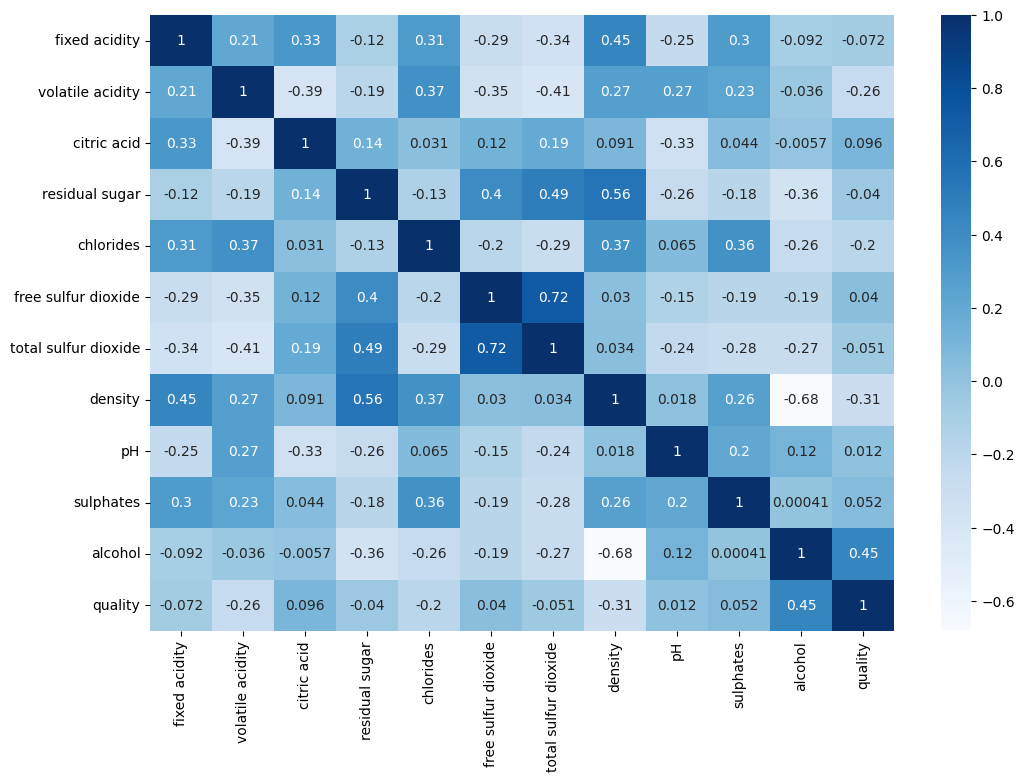

In [119]:
plt.figure(figsize=(12,8))
sns.heatmap(train_set.corr(numeric_only = True),annot=True, cmap="Blues");
plt.show();

In [120]:
features = df.columns.to_list()
features.remove(target)
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'quality',
 'class']

In [121]:
features_num_in = tlb.get_features_num_regression(X_train, target, 0.3, pvalue = 0.05)
features_num_in

['residual sugar', 'density']

In [122]:
#Inicializamos la lista de salida
features_cat_in = []
col_cat = ["class"]
pvalue = 0.05

#Por cada columna categórica o binaria 
for valor in col_cat:
    grupos = df[valor].unique()  # Obtener los valores únicos de la columna categórica
    if len(grupos) == 2:
        grupo_a = df.loc[df[valor] == grupos[0]][target]
        grupo_b = df.loc[df[valor] == grupos[1]][target]
        _, p = shapiro(grupo_a) #Usamos la prueba de normalidad de Shapiro-Wilk para saber si siguen una distribución normal o no
        _, p2 = shapiro(grupo_b)
        if p < 0.05 and p2 < 0.05:
            stat, p_val = ttest_ind(grupo_a, grupo_b) # Aplicamos el t-Student si siguen una distribución normal
        else:
            u_stat, p_val = mannwhitneyu(grupo_a, grupo_b)  # Aplicamos el test U de Mann si no la siguen
    else:
        v_cat = [df[df[valor] == grupo][target_col] for grupo in grupos] # obtenemos los grupos y los incluimos en una lista
        f_val, p_val = stats.f_oneway(*v_cat) # Aplicamos el test ANOVA. El método * (igual que cuando vimos *args hace mil años)
    if p_val < pvalue:
        features_cat_in.append(valor) #Si supera el test correspondiente añadimos la variable a la lista de salida

print(features_cat_in)
        

['class']


In [123]:
X_train_scaled["class"] = y_train
X_test_scaled["class"] = y_test

In [124]:
y_train = X_train[target]
y_test = X_test[target]

In [126]:
X_test_scaled

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
3103,-0.069834,-0.289263,-1.096875,-0.205494,0.603446,0.830695,0.99335,3.03,0.52,-1.022479,5
1419,0.062324,-0.505652,-0.242603,-0.702119,0.205301,0.043129,0.99031,3.10,0.40,1.487767,7
4761,-0.069834,0.263694,0.195769,-0.835769,0.439229,0.071287,0.99120,3.36,0.60,1.634340,8
4690,-0.690442,0.060273,-0.979618,-0.969939,0.786503,0.600571,0.99040,3.29,0.54,1.634340,6
4032,0.062324,-0.360820,-0.819648,-0.568984,1.231666,0.511364,0.98930,3.00,0.47,1.413652,7
...,...,...,...,...,...,...,...,...,...,...,...
889,-0.306002,0.060273,1.645196,0.251656,0.349937,1.042859,0.99800,3.00,0.45,-1.118286,5
2850,0.876056,0.847887,-0.979618,2.874151,0.523558,-0.886684,0.99836,3.38,0.86,-0.466469,4
4917,0.062324,1.095898,-0.721949,-0.107022,-2.237064,-3.230899,0.99458,3.20,0.69,1.338973,7
5198,0.816068,-1.031634,-0.979618,0.574520,-1.800499,-2.971658,0.99425,3.61,0.54,0.799688,5


In [129]:
X_train_scaled = X_train_scaled.drop(columns=target)
X_test_scaled = X_test_scaled.drop(columns=target)

In [133]:
features_in = features_num_in + features_cat_in

In [135]:
X_train_scaled = X_train_scaled[features_in]
X_test_scaled = X_test_scaled[features_in]

In [136]:
model_names = ["Reg. Lineal", "Random Forest","XGBoost","LightGBM","CatBoost"]

lr_reg = LinearRegression()
rf_reg = RandomForestRegressor(max_depth=5, random_state= 42)
xgb_reg = XGBRegressor(max_depth=5, random_state = 42)
lgb_reg  = LGBMRegressor(max_depth=5, random_state= 42, verbose = -100)
cat_reg  = CatBoostRegressor(max_depth=5, random_state= 42, verbose = False)

model_set = [lr_reg, rf_reg, xgb_reg, lgb_reg, cat_reg]

In [138]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(f"Para {nombre}:", end = " ")
    metrica = cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "neg_mean_absolute_percentage_error")
    print(np.mean(metrica))
    metricas_cv[nombre] = metrica
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"And the winner is: {ganador} con una metrica de {np.mean(metricas_cv[ganador])}")

Para Reg. Lineal: -0.06045020941971765
Para Random Forest: -0.04791856587604827
Para XGBoost: -0.0421322478383057
Para LightGBM: -0.042954086729572474
Para CatBoost: -0.04237162998887757
And the winner is: XGBoost con una metrica de -0.0421322478383057


In [150]:
xgb_reg = XGBRegressor()

param_grid = {
    "n_estimators": [100,200,1000],
    "max_depth": [1,5,10,20],
    }

xgb_grid = GridSearchCV(xgb_reg, 
                        cv = 5,
                        #n_iter = 20,
                        param_grid= param_grid, 
                        scoring = "neg_mean_absolute_percentage_error")


xgb_grid.fit(X_train_scaled, y_train)
print("XGB best_score:", xgb_grid.best_score_)

XGB best_score: -0.04020693629859974


In [151]:
print(xgb_grid.best_params_)

{'max_depth': 10, 'n_estimators': 1000}


In [152]:
predictions = xgb_grid.best_estimator_.predict(X_test_scaled)
print('MAE: ', round(metrics.mean_absolute_error(y_test, predictions), 3))
print('RMSE: ', round(metrics.mean_squared_error(y_test, predictions), 3))
print('MAPE: ', round(metrics.mean_absolute_percentage_error(y_test, predictions), 3))

MAE:  0.401
RMSE:  0.403
MAPE:  0.038


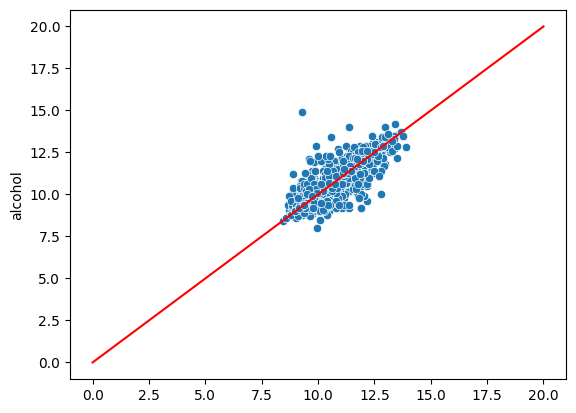

In [155]:
predictions = xgb_grid.best_estimator_.predict(X_test_scaled)
sns.scatterplot(x=predictions,y=y_test);
plt.plot([0,20],[0,20],'red')
plt.show()

El MAPE consguido es muy bueno, lo cual era nuestro objetivo.
